In [1]:
# ROC curve

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier # k 근접 이웃
from sklearn.ensemble import RandomForestClassifier # 앙상블 _ 랜덤 포레스트
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [4]:
# roc curv 함수 정의
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color = 'purple', label = 'ROC')
    plt.plot([0,1],[0,1], color = 'red', linestyle = '--')
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title('Reciever Operating Characteristics(ROC) Curve')
    plt.legend()
    plt.show()

#fpr(false positive rate : 특이도(틀리도))
#tpr(true positive rate : 민감도 , 재현율)

In [5]:
data_X, class_label = make_classification(n_samples = 1000 , n_classes = 2, weights = [1,1], random_state = 1)

In [6]:
# Train, Test 분리
train_X, test_X, train_y, test_y = train_test_split(data_X, class_label, test_size = 0.3 , random_state = 1)

In [7]:
# random forest model 적용

model = RandomForestClassifier()
model.fit(train_X, train_y) # fit 은 반드시 train data 로

RandomForestClassifier()

In [9]:
# 테스트 데이터 셋으로 예측 (확률 예측)

print(model.predict(test_X)) # 모델 예측 결과 값

[0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0
 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0
 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1
 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0
 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0
 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0
 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0
 1 1 1 0]


In [10]:
model.predict_proba(test_X) # 모델 예측 결과값 나올확률

array([[0.97, 0.03],
       [0.1 , 0.9 ],
       [0.93, 0.07],
       [0.94, 0.06],
       [0.08, 0.92],
       [0.13, 0.87],
       [0.21, 0.79],
       [0.09, 0.91],
       [0.2 , 0.8 ],
       [0.93, 0.07],
       [0.21, 0.79],
       [0.04, 0.96],
       [0.96, 0.04],
       [0.31, 0.69],
       [0.16, 0.84],
       [0.97, 0.03],
       [0.11, 0.89],
       [0.93, 0.07],
       [0.13, 0.87],
       [0.99, 0.01],
       [0.89, 0.11],
       [0.71, 0.29],
       [0.11, 0.89],
       [0.12, 0.88],
       [0.2 , 0.8 ],
       [0.15, 0.85],
       [0.99, 0.01],
       [0.15, 0.85],
       [0.17, 0.83],
       [0.12, 0.88],
       [0.99, 0.01],
       [0.9 , 0.1 ],
       [0.24, 0.76],
       [0.31, 0.69],
       [0.26, 0.74],
       [0.86, 0.14],
       [0.94, 0.06],
       [0.79, 0.21],
       [0.1 , 0.9 ],
       [0.97, 0.03],
       [0.98, 0.02],
       [0.33, 0.67],
       [1.  , 0.  ],
       [0.78, 0.22],
       [0.21, 0.79],
       [0.96, 0.04],
       [0.24, 0.76],
       [0.11,

In [11]:
probs = model.predict_proba(test_X)

In [12]:
# 성능 평가

# positive class 만 유지
probs[:, 1]

array([0.03, 0.9 , 0.07, 0.06, 0.92, 0.87, 0.79, 0.91, 0.8 , 0.07, 0.79,
       0.96, 0.04, 0.69, 0.84, 0.03, 0.89, 0.07, 0.87, 0.01, 0.11, 0.29,
       0.89, 0.88, 0.8 , 0.85, 0.01, 0.85, 0.83, 0.88, 0.01, 0.1 , 0.76,
       0.69, 0.74, 0.14, 0.06, 0.21, 0.9 , 0.03, 0.02, 0.67, 0.  , 0.22,
       0.79, 0.04, 0.76, 0.89, 0.76, 0.12, 0.01, 0.72, 0.02, 0.07, 0.08,
       0.07, 0.76, 0.9 , 0.12, 0.07, 0.59, 0.04, 0.93, 0.05, 0.17, 0.42,
       0.02, 0.5 , 0.87, 0.63, 0.82, 0.02, 0.87, 0.03, 0.08, 0.89, 0.02,
       0.93, 0.89, 0.82, 0.07, 0.03, 0.82, 0.93, 0.19, 0.81, 0.  , 0.02,
       0.59, 0.75, 0.88, 0.91, 0.42, 0.03, 0.94, 0.19, 0.9 , 0.82, 0.04,
       0.  , 0.8 , 0.03, 0.8 , 0.03, 0.04, 0.94, 0.06, 0.7 , 0.56, 0.67,
       0.85, 0.01, 0.82, 0.87, 0.96, 0.93, 0.87, 0.05, 0.94, 0.01, 0.03,
       0.01, 0.  , 0.86, 0.83, 0.05, 0.8 , 0.93, 0.85, 0.97, 0.88, 0.03,
       0.89, 0.86, 0.34, 0.81, 0.04, 0.89, 0.94, 0.76, 0.84, 0.7 , 0.05,
       0.02, 0.93, 0.14, 0.84, 0.3 , 0.12, 0.79, 0.

In [13]:
probs = probs[:, 1]

In [15]:
# auc 구하기

roc_auc_score(test_y, probs) # test data의 실제값, 예측값

0.9541139240506329

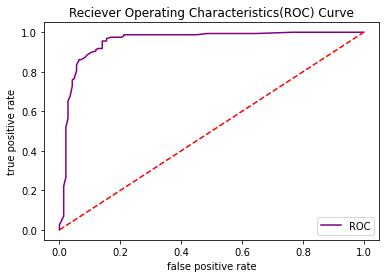

In [16]:
auc = roc_auc_score(test_y, probs)

# roc curve 곡선 그리기 
fpr, tpr, thresholds= roc_curve(test_y, probs)
plot_roc_curve(fpr, tpr)